# Customer Clustering Pipeline
## End-to-End Machine Learning Project

**Objective:** Design and implement a comprehensive clustering pipeline to segment customers based on their spending and payment behavior.

**Pipeline Steps:**
1. Data Loading & Exploration
2. Data Cleaning & Preprocessing
3. Handling Missing Values & Outliers
4. Feature Engineering
5. Exploratory Data Analysis (EDA)
6. Feature Scaling
7. Determining Optimal Number of Clusters
8. Model Training (K-Means, Hierarchical Clustering, DBSCAN)
9. Cluster Evaluation
10. Cluster Interpretation & Profiling

---

## 0. Setup & Installation
Download dataset and install required libraries

In [15]:
# Install gdown if not already installed
!pip install -U -q gdown


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Download complete. You can list the files in the current directory to see the downloaded content.
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Download complete. You can list the files in the current directory to see the downloaded content.


C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: c:\Users\asus\Documents\Laptop naia\Kuliah\SEMESTER 7\Machine Learning\UTS Dataset 3\Machine Learning\clusteringmidterm.csv

  0%|          | 0.00/1.01M [00:00<?, ?B/s]
 52%|█████▏    | 524k/1.01M [00:00<00:00, 4.23MB/s]
100%|██████████| 1.01M/1.01M [00:00<00:00, 4.98MB/s]
Download completed


---
## 1. Data Loading & Initial Exploration
Load the dataset and understand its structure

In [17]:
# Import all necessary libraries
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, RobustScaler

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Other utilities
from scipy import stats

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")
print(f"✓ Polars version: {pl.__version__}")

✓ All libraries imported successfully!
✓ Polars version: 1.33.1


In [18]:
# Load the dataset using Polars for efficient processing
# Change the path below if your CSV is in a different location
csv_path = 'Machine Learning/clusteringmidterm.csv'

df_pl = pl.read_csv(csv_path)

print("Dataset loaded successfully with Polars!")
print(f"Dataset Shape: {df_pl.shape}")
print(f"Number of rows: {df_pl.shape[0]}")
print(f"Number of columns: {df_pl.shape[1]}")
print("\nFirst few rows:")
display(df_pl.head())

Dataset loaded successfully with Polars!
Dataset Shape: (8950, 18)
Number of rows: 8950
Number of columns: 18

First few rows:


CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,i64
"""C10001""",40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12
"""C10002""",3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
"""C10003""",2495.148862,1.0,773.17,773.17,0.0,0.0,1.0,1.0,0.0,0.0,0,12,7500.0,622.066742,627.284787,0.0,12
"""C10004""",1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.0,null,0.0,12
"""C10005""",817.714335,1.0,16.0,16.0,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,1200.0,678.334763,244.791237,0.0,12


In [19]:
# Basic dataset information using Polars
print("="*60)
print("DATASET INFORMATION")
print("="*60)
print("\nColumn Names and Data Types:")
print(df_pl.schema)
print("\n" + "="*60)
print("Basic Statistics:")
print("="*60)
display(df_pl.describe())
print("\n" + "="*60)
print("Dataset Info:")
print("="*60)
print(f"Estimated size in memory: {df_pl.estimated_size() / 1024**2:.2f} MB")
for col in df_pl.columns:
    print(f"{col}: {df_pl[col].dtype}")

DATASET INFORMATION

Column Names and Data Types:
Schema([('CUST_ID', String), ('BALANCE', Float64), ('BALANCE_FREQUENCY', Float64), ('PURCHASES', Float64), ('ONEOFF_PURCHASES', Float64), ('INSTALLMENTS_PURCHASES', Float64), ('CASH_ADVANCE', Float64), ('PURCHASES_FREQUENCY', Float64), ('ONEOFF_PURCHASES_FREQUENCY', Float64), ('PURCHASES_INSTALLMENTS_FREQUENCY', Float64), ('CASH_ADVANCE_FREQUENCY', Float64), ('CASH_ADVANCE_TRX', Int64), ('PURCHASES_TRX', Int64), ('CREDIT_LIMIT', Float64), ('PAYMENTS', Float64), ('MINIMUM_PAYMENTS', Float64), ('PRC_FULL_PAYMENT', Float64), ('TENURE', Int64)])

Basic Statistics:


statistic,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""8950""",8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8949.0,8950.0,8637.0,8950.0,8950.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,313.0,0.0,0.0
"""mean""",null,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,864.206542,0.153715,11.517318
"""std""",null,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
"""min""","""C10001""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.019163,0.0,6.0
"""25%""",null,128.25396,0.888889,39.58,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,1.0,1600.0,383.273938,169.123707,0.0,12.0
"""50%""",null,873.680279,1.0,361.49,38.0,89.0,0.0,0.5,0.083333,0.166667,0.0,0.0,7.0,3000.0,857.062706,312.343947,0.0,12.0
"""75%""",null,2054.372848,1.0,1110.17,577.83,468.65,1113.868654,0.916667,0.3,0.75,0.222222,4.0,17.0,6500.0,1901.27932,825.485459,0.142857,12.0
"""max""","""C19190""",19043.13856,1.0,49039.57,40761.25,22500.0,47137.21176,1.0,1.0,1.0,1.5,123.0,358.0,30000.0,50721.48336,76406.20752,1.0,12.0



Dataset Info:
Estimated size in memory: 1.21 MB
CUST_ID: String
BALANCE: Float64
BALANCE_FREQUENCY: Float64
PURCHASES: Float64
ONEOFF_PURCHASES: Float64
INSTALLMENTS_PURCHASES: Float64
CASH_ADVANCE: Float64
PURCHASES_FREQUENCY: Float64
ONEOFF_PURCHASES_FREQUENCY: Float64
PURCHASES_INSTALLMENTS_FREQUENCY: Float64
CASH_ADVANCE_FREQUENCY: Float64
CASH_ADVANCE_TRX: Int64
PURCHASES_TRX: Int64
CREDIT_LIMIT: Float64
PAYMENTS: Float64
MINIMUM_PAYMENTS: Float64
PRC_FULL_PAYMENT: Float64
TENURE: Int64


---
## 2. Data Cleaning & Preprocessing
Check for missing values, duplicates, and data quality issues

In [20]:
# Check for missing values using Polars
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing_data = []
for col in df_pl.columns:
    null_count = df_pl[col].null_count()
    null_pct = (null_count / len(df_pl)) * 100
    if null_count > 0:
        missing_data.append({
            'Column': col,
            'Missing Count': null_count,
            'Percentage': null_pct
        })

if missing_data:
    print("\nColumns with missing values:")
    missing_df = pl.DataFrame(missing_data).sort('Missing Count', descending=True)
    display(missing_df)
else:
    print("\n✓ No missing values found in the dataset!")
    
# Check for duplicates
print("\n" + "="*60)
print("DUPLICATE ROWS ANALYSIS")
print("="*60)
duplicates = len(df_pl) - df_pl.unique().shape[0]
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df_pl))*100:.2f}%")
else:
    print("✓ No duplicate rows found!")

MISSING VALUES ANALYSIS

Columns with missing values:


Column,Missing Count,Percentage
str,i64,f64
"""MINIMUM_PAYMENTS""",313,3.497207
"""CREDIT_LIMIT""",1,0.011173



DUPLICATE ROWS ANALYSIS
Number of duplicate rows: 0
✓ No duplicate rows found!


In [21]:
# Handle missing values (if any) using Polars
# Create a copy for processing
df_clean_pl = df_pl.clone()

# Strategy for handling missing values:
# 1. For numerical columns: fill with median
# 2. For categorical columns: fill with mode

for col in df_clean_pl.columns:
    if df_clean_pl[col].null_count() > 0:
        if df_clean_pl[col].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Int16, pl.Int8]:
            median_val = df_clean_pl[col].median()
            df_clean_pl = df_clean_pl.with_columns(df_clean_pl[col].fill_null(median_val).alias(col))
            print(f"✓ Filled missing values in '{col}' with median: {median_val}")
        else:
            mode_val = df_clean_pl[col].mode().first()
            df_clean_pl = df_clean_pl.with_columns(df_clean_pl[col].fill_null(mode_val).alias(col))
            print(f"✓ Filled missing values in '{col}' with mode: {mode_val}")

# Remove duplicates if any
initial_rows = len(df_clean_pl)
df_clean_pl = df_clean_pl.unique()
removed_duplicates = initial_rows - len(df_clean_pl)

if removed_duplicates > 0:
    print(f"\n✓ Removed {removed_duplicates} duplicate rows")
    
print(f"\nCleaned dataset shape: {df_clean_pl.shape}")
print(f"Memory usage: {df_clean_pl.estimated_size() / 1024**2:.2f} MB")

✓ Filled missing values in 'CREDIT_LIMIT' with median: 3000.0
✓ Filled missing values in 'MINIMUM_PAYMENTS' with median: 312.343947

Cleaned dataset shape: (8950, 18)
Memory usage: 1.21 MB


---
## 3. Outlier Detection & Treatment
Identify and handle outliers using statistical methods

In [22]:
# Detect outliers using IQR method for numerical columns using Polars
def detect_outliers_iqr_polars(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data.filter((pl.col(column) < lower_bound) | (pl.col(column) > upper_bound))
    return len(outliers), lower_bound, upper_bound

# Identify numerical columns
numerical_cols = [col for col in df_clean_pl.columns if df_clean_pl[col].dtype in 
                  [pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Int16, pl.Int8]]

print("="*60)
print("OUTLIER DETECTION")
print("="*60)

outlier_summary = []
for col in numerical_cols:
    outlier_count, lower, upper = detect_outliers_iqr_polars(df_clean_pl, col)
    outlier_percentage = (outlier_count / len(df_clean_pl)) * 100
    outlier_summary.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Percentage': f"{outlier_percentage:.2f}%",
        'Lower Bound': f"{lower:.2f}",
        'Upper Bound': f"{upper:.2f}"
    })

outlier_df_pl = pl.DataFrame(outlier_summary)
display(outlier_df_pl)

OUTLIER DETECTION


Column,Outlier Count,Percentage,Lower Bound,Upper Bound
str,i64,str,str,str
"""BALANCE""",695,"""7.77%""","""-2760.92""","""4943.55"""
"""BALANCE_FREQUENCY""",1493,"""16.68%""","""0.72""","""1.17"""
"""PURCHASES""",808,"""9.03%""","""-1566.31""","""2716.06"""
"""ONEOFF_PURCHASES""",1013,"""11.32%""","""-866.75""","""1444.58"""
"""INSTALLMENTS_PURCHASES""",867,"""9.69%""","""-702.97""","""1171.62"""
…,…,…,…,…
"""CREDIT_LIMIT""",248,"""2.77%""","""-5750.00""","""13850.00"""
"""PAYMENTS""",808,"""9.03%""","""-1893.73""","""4178.29"""
"""MINIMUM_PAYMENTS""",909,"""10.16%""","""-755.95""","""1715.53"""


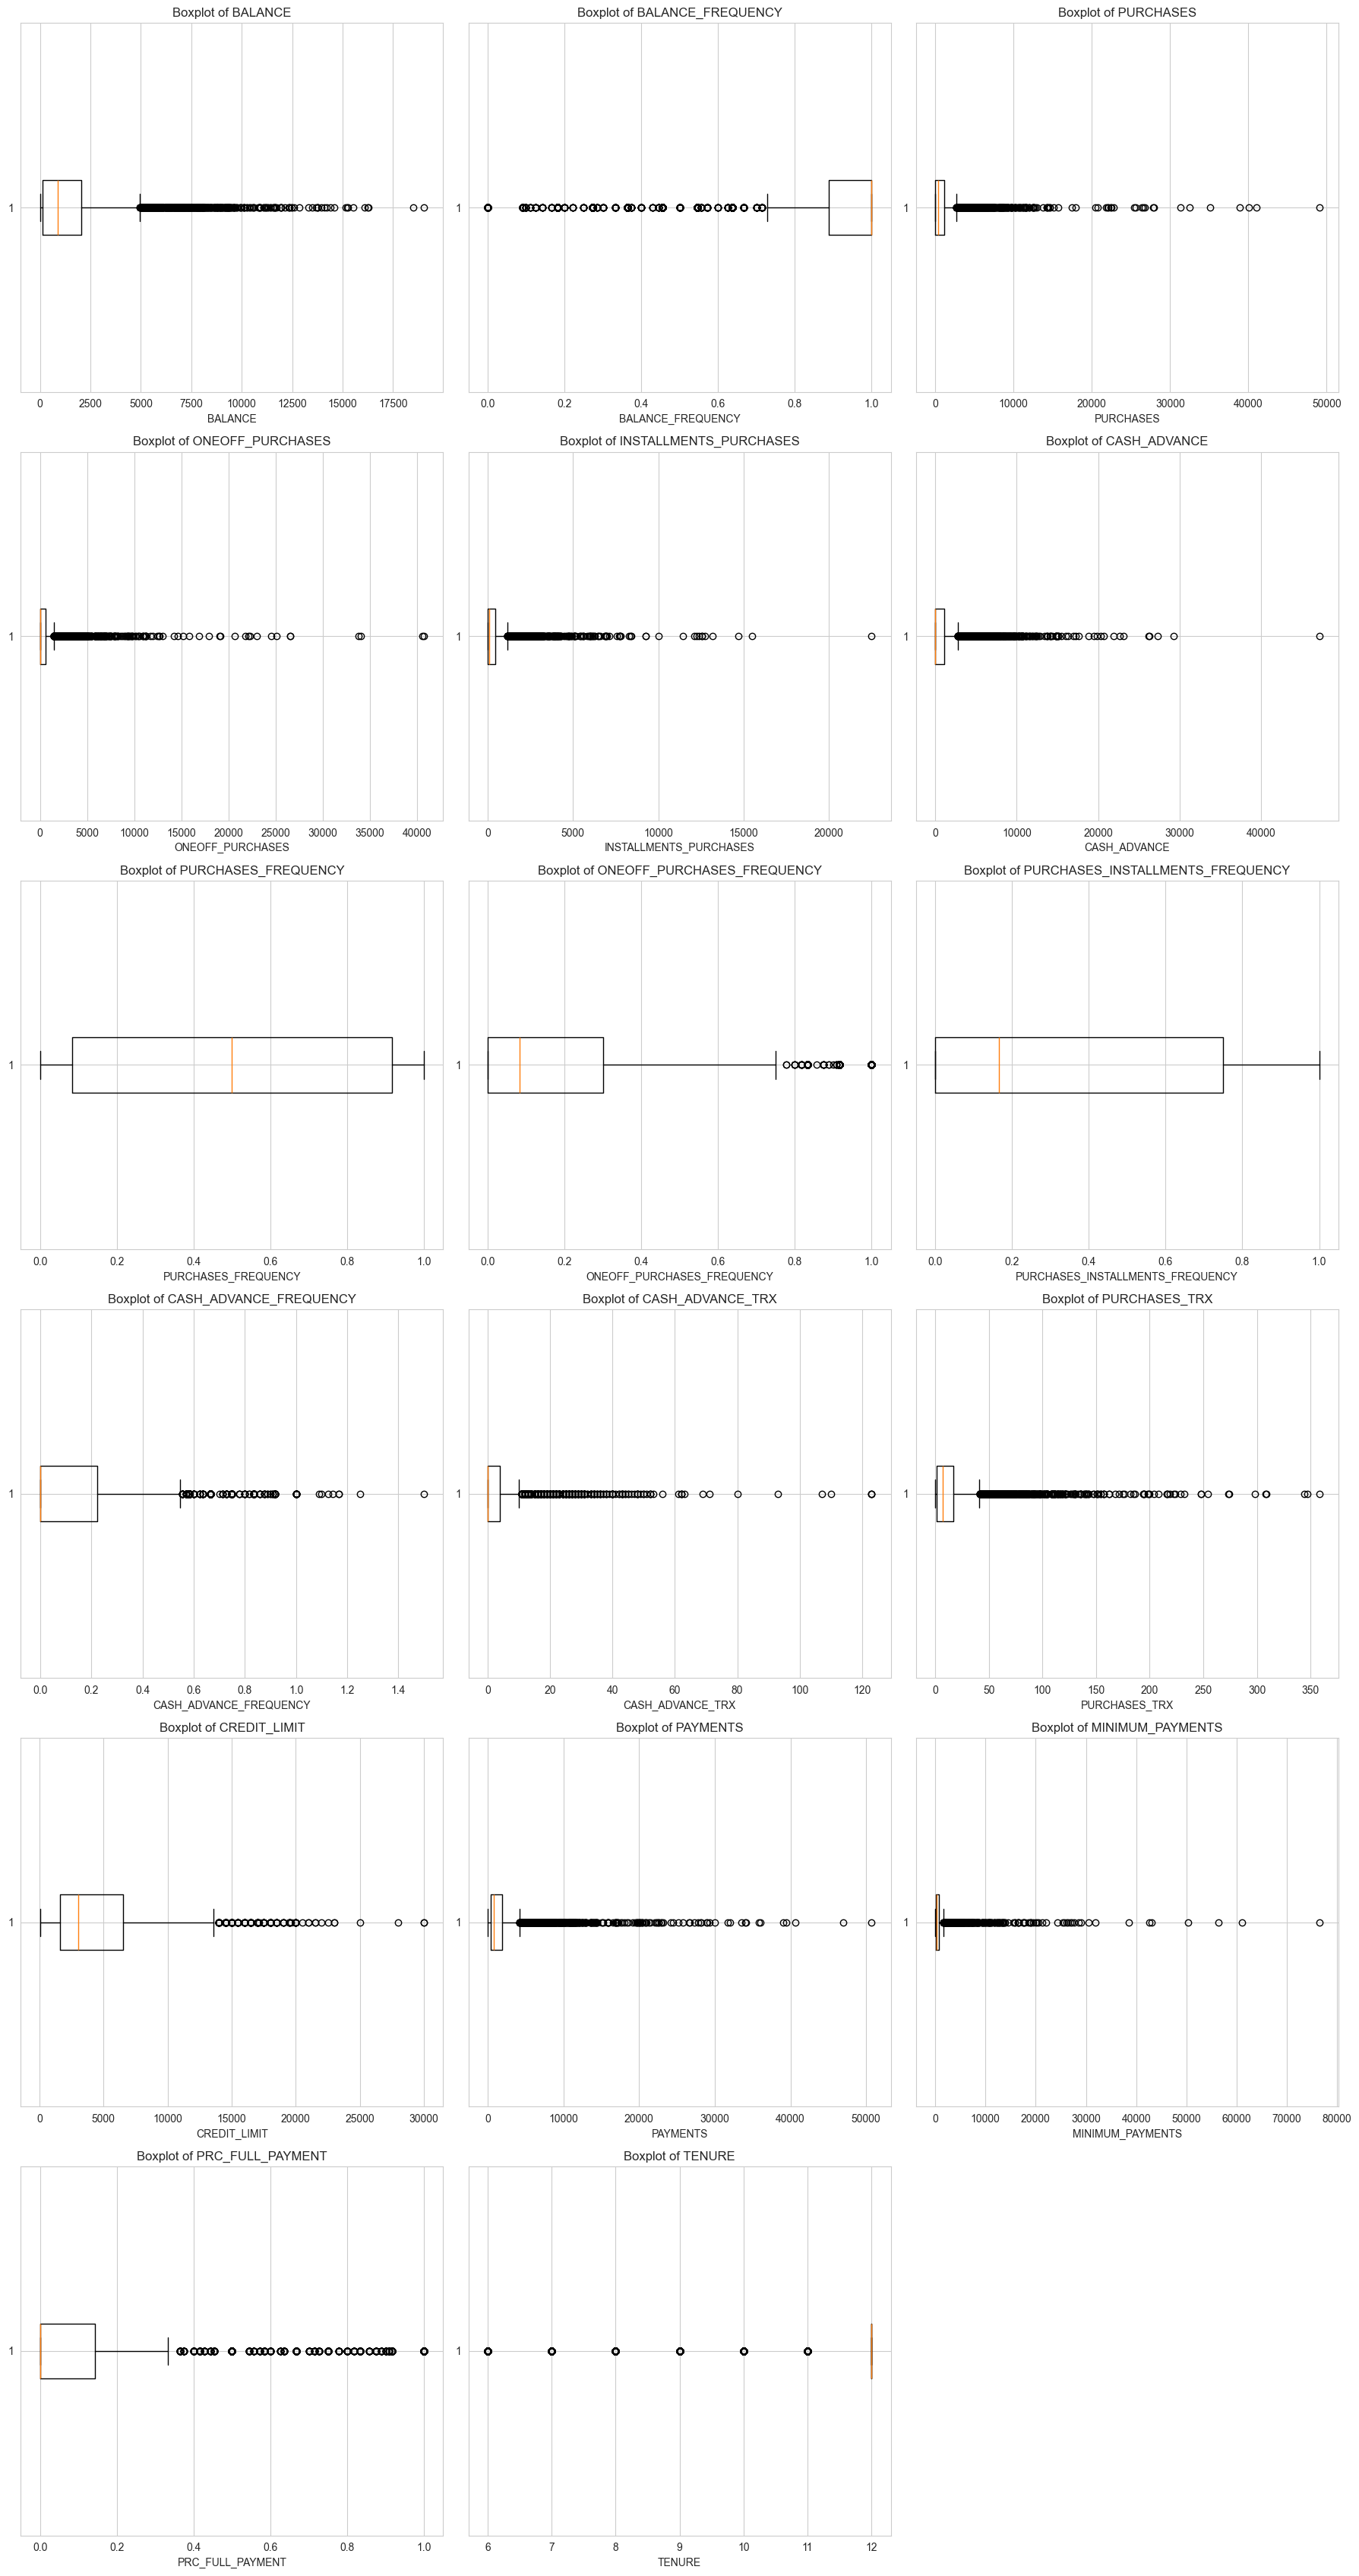

In [23]:
# Visualize outliers with boxplots
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(18, len(numerical_cols)*2))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Convert to numpy for plotting
    data_to_plot = df_clean_pl[col].drop_nulls().to_numpy()
    axes[idx].boxplot(data_to_plot, vert=False)
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].set_xlabel(col)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [24]:
# Handle outliers using capping method (Winsorization) with Polars
df_processed_pl = df_clean_pl.clone()

for col in numerical_cols:
    q1 = df_processed_pl[col].quantile(0.25)
    q3 = df_processed_pl[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap the outliers using Polars expressions
    df_processed_pl = df_processed_pl.with_columns(
        pl.when(pl.col(col) < lower_bound).then(lower_bound)
          .when(pl.col(col) > upper_bound).then(upper_bound)
          .otherwise(pl.col(col))
          .alias(col)
    )

print("✓ Outliers handled using capping method")
print(f"Processed dataset shape: {df_processed_pl.shape}")
print(f"Memory usage: {df_processed_pl.estimated_size() / 1024**2:.2f} MB")

✓ Outliers handled using capping method
Processed dataset shape: (8950, 18)
Memory usage: 1.21 MB


---
## 4. Feature Engineering
Create new meaningful features from existing data

In [25]:
# Feature Engineering - Create useful features based on customer behavior
df_features_pl = df_processed_pl.clone()

# Display current columns to understand what we're working with
print("Current columns in the dataset:")
print(df_features_pl.columns)
print(f"\nDataset shape: {df_features_pl.shape}")
print(f"Memory usage: {df_features_pl.estimated_size() / 1024**2:.2f} MB")

# Note: Feature engineering will be based on actual columns
# Convert to pandas only when necessary for sklearn operations
print("\n✓ Feature engineering ready - will convert to pandas for sklearn operations")

Current columns in the dataset:
['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Dataset shape: (8950, 18)
Memory usage: 1.21 MB

✓ Feature engineering ready - will convert to pandas for sklearn operations


---
## 5. Exploratory Data Analysis (EDA)
Visualize data distributions and relationships

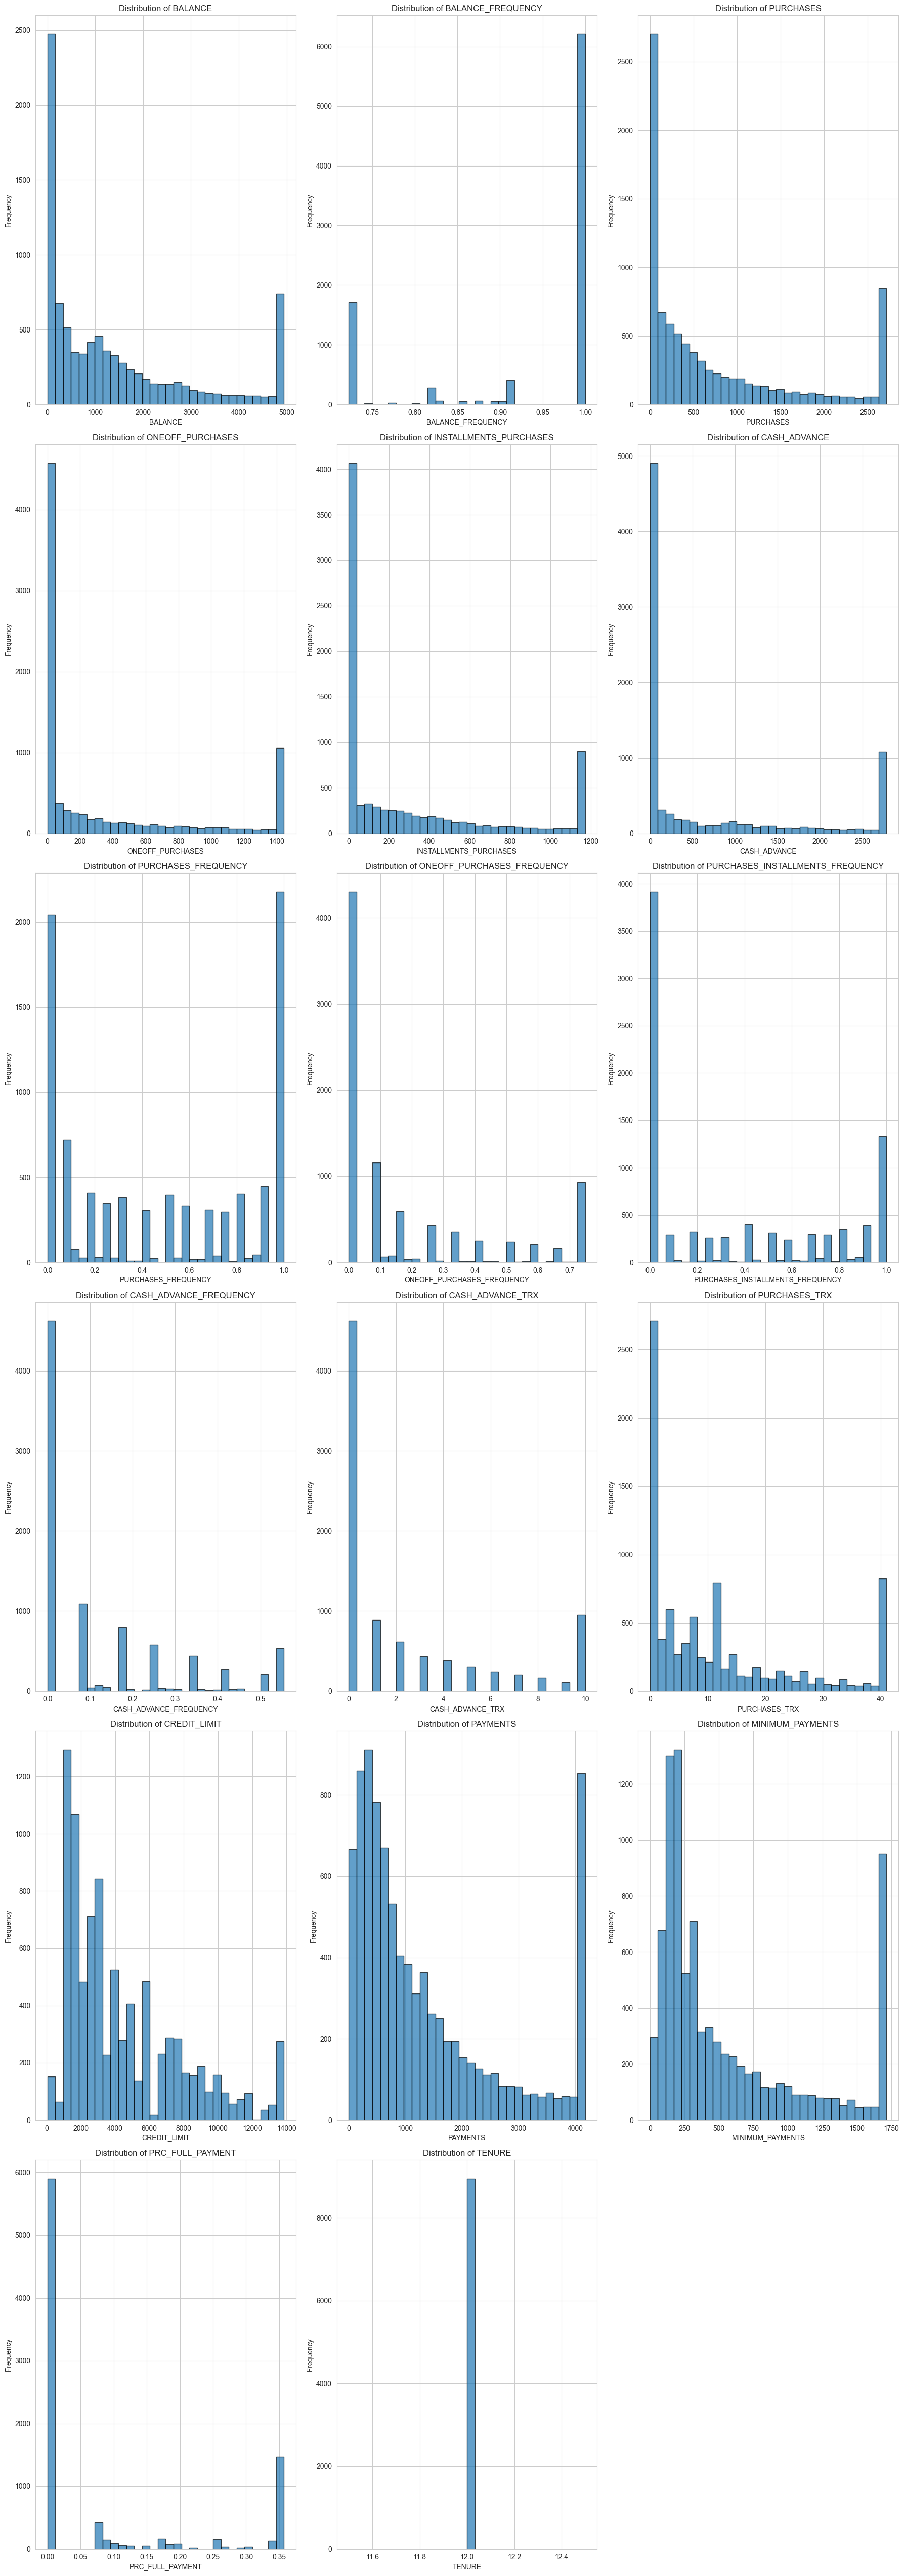

In [26]:
# Distribution plots for numerical features
num_cols = numerical_cols  # Already defined earlier

fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(18, len(num_cols)*3))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    # Convert to numpy for plotting
    data_to_plot = df_features_pl[col].drop_nulls().to_numpy()
    axes[idx].hist(data_to_plot, bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide empty subplots
for idx in range(len(num_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

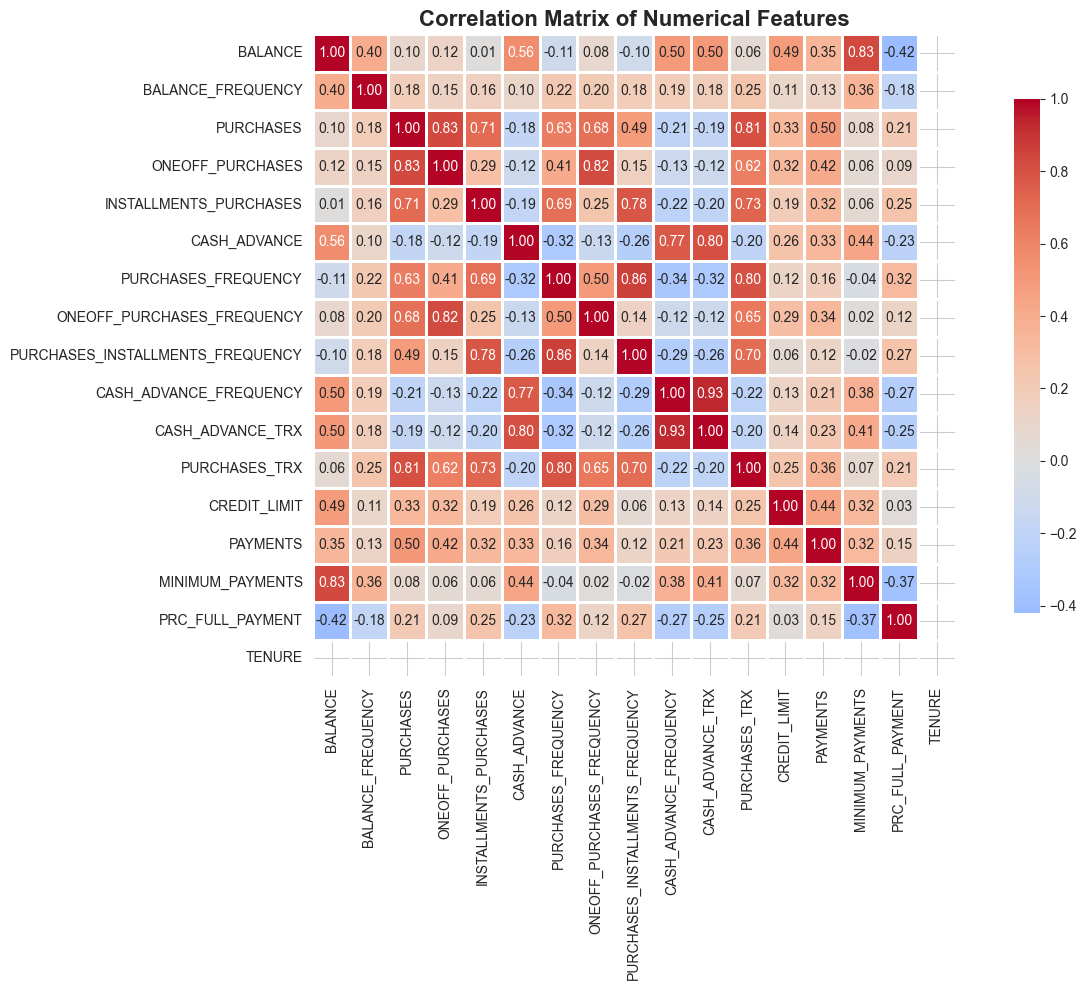


Highly correlated features (|correlation| > 0.7):


,Feature 1,Feature 2,Correlation
0,BALANCE,MINIMUM_PAYMENTS,0.833
1,PURCHASES,ONEOFF_PURCHASES,0.831
2,PURCHASES,INSTALLMENTS_PURCHASES,0.706
3,PURCHASES,PURCHASES_TRX,0.809
4,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,0.822
5,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,0.780
6,INSTALLMENTS_PURCHASES,PURCHASES_TRX,0.725
7,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.770
8,CASH_ADVANCE,CASH_ADVANCE_TRX,0.801
9,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.863


In [27]:
# Correlation heatmap - convert to pandas for correlation calculation
df_numeric_pd = df_features_pl.select(num_cols).to_pandas()

plt.figure(figsize=(14, 10))
correlation_matrix = df_numeric_pd.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Highly correlated features (|correlation| > 0.7):")
print("="*60)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': f"{correlation_matrix.iloc[i, j]:.3f}"
            })
if high_corr:
    display(pd.DataFrame(high_corr))
else:
    print("No highly correlated features found.")

---
## 6. Feature Scaling
Standardize features for clustering algorithms

In [28]:
# Select only numerical features for clustering
# Convert Polars to Pandas for sklearn operations
clustering_features_pd = df_features_pl.select(num_cols).to_pandas()

print("Features selected for clustering:")
print(clustering_features_pd.columns.tolist())
print(f"\nShape: {clustering_features_pd.shape}")
print(f"Memory usage: {clustering_features_pd.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_features_pd)

# Convert back to DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features_pd.columns, 
                           index=clustering_features_pd.index)

print("\n✓ Features scaled successfully!")
print("\nScaled data statistics:")
display(X_scaled_df.describe())

Features selected for clustering:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Shape: (8950, 17)
Memory usage: 1.16 MB

✓ Features scaled successfully!

Scaled data statistics:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,8.554299e-17,-1.253572e-15,-4.525244e-17,-1.508415e-17,1.206732e-16,-1.091616e-16,9.090184e-17,-7.145122e-18,6.430610e-17,-1.841854e-16,-2.461098e-17,5.716098e-17,5.279452e-17,6.192439e-17,1.968878e-16,-8.137501e-18,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.043896e-01,-1.886552e+00,-8.381430e-01,-6.922721e-01,-7.460235e-01,-6.735009e-01,-1.221758e+00,-7.227488e-01,-9.169952e-01,-7.300836e-01,-6.972927e-01,-8.913330e-01,-1.291269e+00,-1.058382e+00,-1.046200e+00,-6.292774e-01,0.0
25%,-8.209577e-01,-3.847451e-01,-7.930788e-01,-6.922721e-01,-7.460235e-01,-6.735009e-01,-1.014125e+00,-7.227488e-01,-9.169952e-01,-7.300836e-01,-6.972927e-01,-8.146512e-01,-8.331770e-01,-7.572553e-01,-7.251659e-01,-6.292774e-01,0.0
50%,-3.363580e-01,6.164594e-01,-4.273748e-01,-6.180607e-01,-5.213703e-01,-6.735009e-01,2.404259e-02,-3.967881e-01,-4.976286e-01,-7.300836e-01,-6.972927e-01,-3.545609e-01,-4.194164e-01,-3.851448e-01,-4.592896e-01,-6.292774e-01,0.0
75%,4.315803e-01,6.164594e-01,4.240529e-01,4.353604e-01,4.369083e-01,4.420068e-01,1.062211e+00,4.507143e-01,9.701506e-01,5.569155e-01,4.730894e-01,4.122564e-01,6.149849e-01,4.352713e-01,4.358879e-01,4.013761e-01,0.0
max,2.310793e+00,6.164594e-01,2.249958e+00,2.128884e+00,2.211385e+00,2.115387e+00,1.269843e+00,2.210909e+00,1.599199e+00,2.487414e+00,2.228662e+00,2.252618e+00,2.787228e+00,2.224349e+00,2.177524e+00,1.947356e+00,0.0


---
## 7. Determining Optimal Number of Clusters
Use Elbow Method, Silhouette Score, and Dendrogram

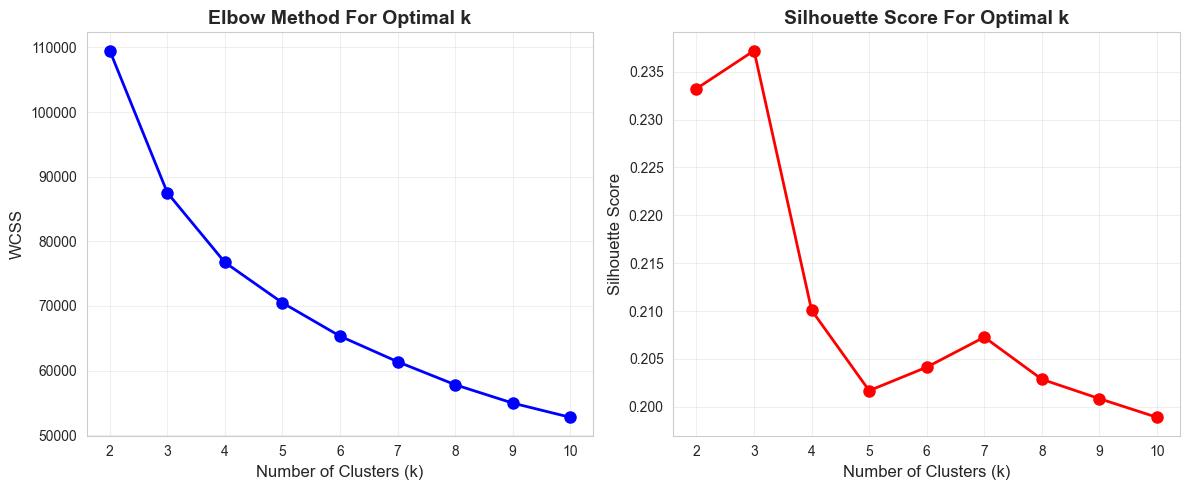


CLUSTER EVALUATION SCORES


,Number of Clusters,WCSS,Silhouette Score
0,2,109508.071883,0.233237
1,3,87517.353587,0.237204
2,4,76737.380981,0.210083
3,5,70487.875851,0.201682
4,6,65331.537315,0.204135
5,7,61374.530743,0.207270
6,8,57817.097024,0.202869
7,9,54973.816810,0.200844
8,10,52773.506119,0.198896



✓ Optimal number of clusters based on Silhouette Score: 3


In [29]:
# Elbow Method - Within-Cluster Sum of Squares (WCSS)
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Silhouette Score Method
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score For Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print scores
print("\n" + "="*60)
print("CLUSTER EVALUATION SCORES")
print("="*60)
scores_df = pd.DataFrame({
    'Number of Clusters': list(K_range),
    'WCSS': wcss,
    'Silhouette Score': silhouette_scores
})
display(scores_df)

# Find optimal k based on silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✓ Optimal number of clusters based on Silhouette Score: {optimal_k}")

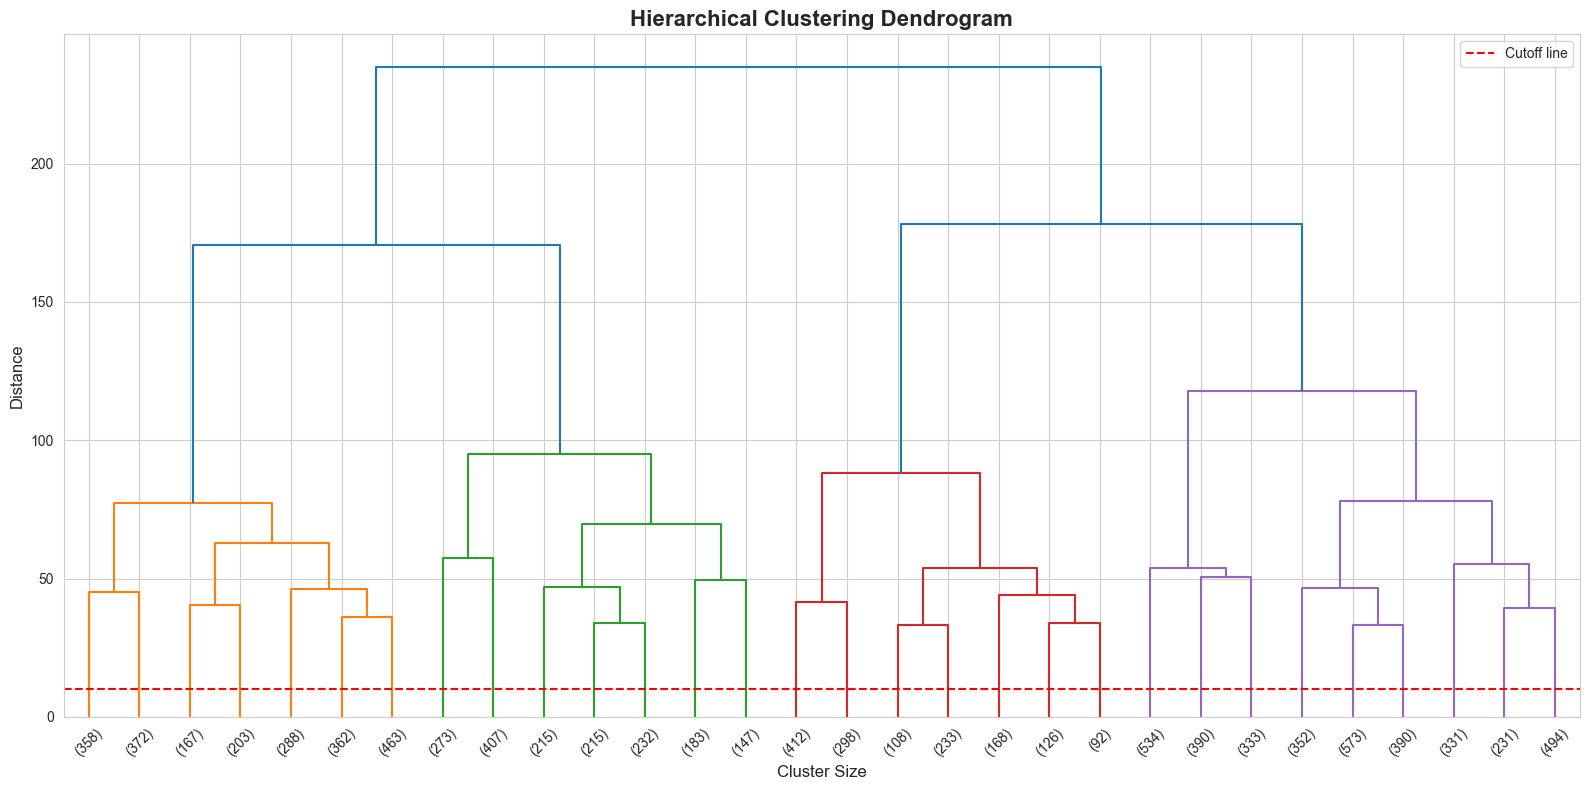

✓ Dendrogram generated successfully!


In [30]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(16, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=10, color='r', linestyle='--', label='Cutoff line')
plt.legend()
plt.tight_layout()
plt.show()

print("✓ Dendrogram generated successfully!")

---
## 8. Model Training
Train different clustering algorithms and compare results

### Clustering Algorithms Used:

**1. K-Means Clustering**
- Partitioning algorithm that divides data into K clusters
- Each cluster has a centroid (center point)
- Points are assigned to nearest centroid
- Best for: spherical, evenly-sized clusters

**2. Hierarchical Clustering (Agglomerative)**
- Bottom-up approach: starts with each point as a cluster
- Progressively merges similar clusters
- Uses Ward linkage: minimizes within-cluster variance
- Best for: hierarchical structure in data

**3. DBSCAN (Density-Based Spatial Clustering)**
- Groups points that are closely packed together
- Identifies outliers as noise points
- No need to specify number of clusters beforehand
- Best for: non-spherical clusters, outlier detection

K-MEANS CLUSTERING

✓ K-Means clustering completed with 3 clusters

Cluster distribution:
KMeans_Cluster
0    2041
1    2316
2    4593
Name: count, dtype: int64


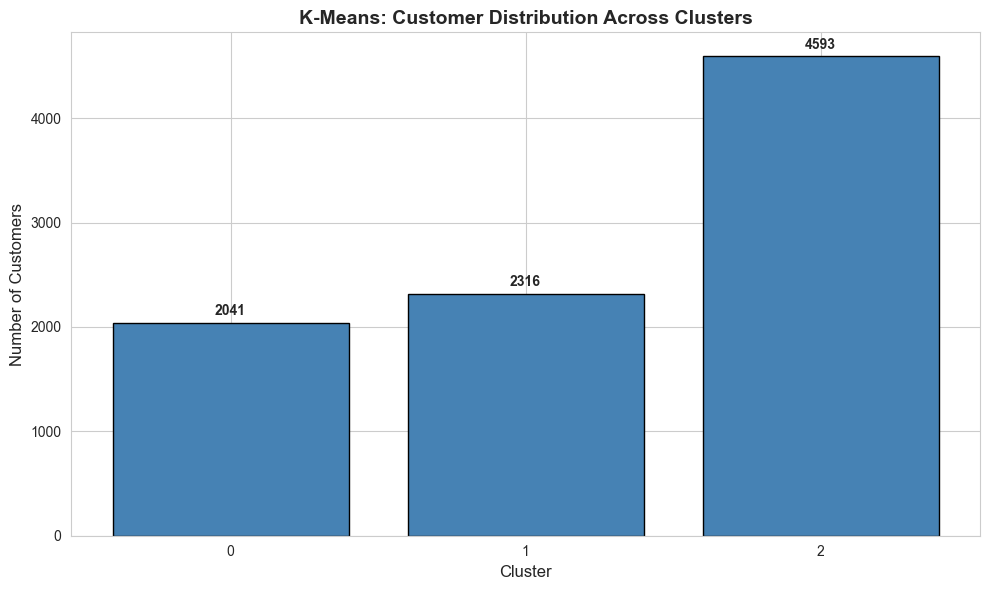

In [31]:
# K-Means Clustering with optimal k
print("="*60)
print("K-MEANS CLUSTERING")
print("="*60)

# Train K-Means model
n_clusters = optimal_k
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels back to pandas dataframe (for compatibility)
df_features_pd = clustering_features_pd.copy()
df_features_pd['KMeans_Cluster'] = kmeans_labels

print(f"\n✓ K-Means clustering completed with {n_clusters} clusters")
print(f"\nCluster distribution:")
print(df_features_pd['KMeans_Cluster'].value_counts().sort_index())

# Visualize cluster sizes
plt.figure(figsize=(10, 6))
cluster_counts = df_features_pd['KMeans_Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('K-Means: Customer Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.xticks(cluster_counts.index)
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + max(cluster_counts.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 8.1 K-Means Clustering
Train K-Means algorithm with optimal number of clusters

HIERARCHICAL CLUSTERING

✓ Hierarchical clustering completed with 3 clusters

Cluster distribution:
Hierarchical_Cluster
0    3885
1    3628
2    1437
Name: count, dtype: int64

✓ Hierarchical clustering completed with 3 clusters

Cluster distribution:
Hierarchical_Cluster
0    3885
1    3628
2    1437
Name: count, dtype: int64


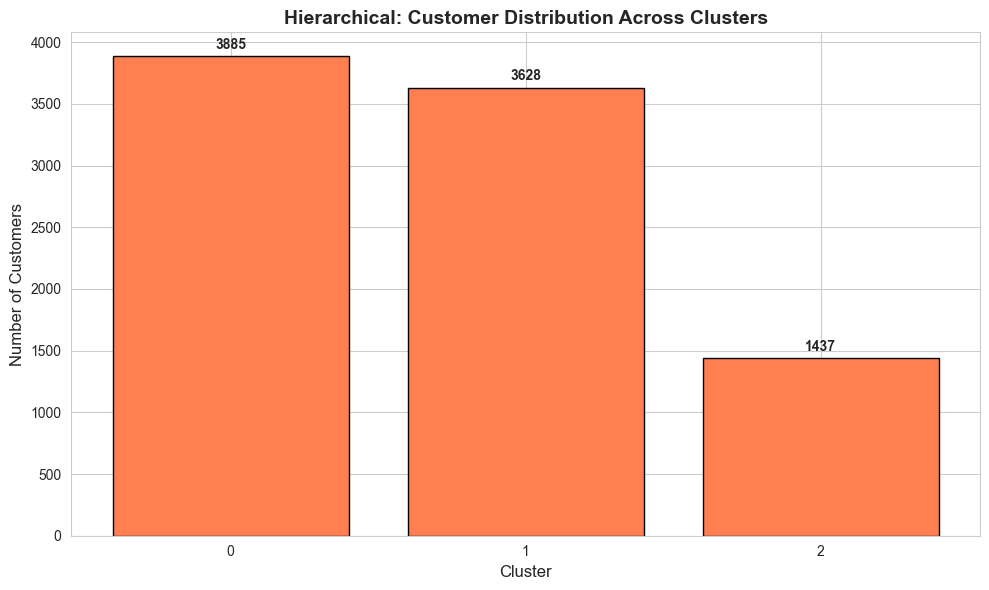

In [32]:
# Hierarchical Clustering (Agglomerative)
print("="*60)
print("HIERARCHICAL CLUSTERING")
print("="*60)

hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_features_pd['Hierarchical_Cluster'] = hierarchical_labels

print(f"\n✓ Hierarchical clustering completed with {n_clusters} clusters")
print(f"\nCluster distribution:")
print(df_features_pd['Hierarchical_Cluster'].value_counts().sort_index())

# Visualize cluster sizes
plt.figure(figsize=(10, 6))
cluster_counts = df_features_pd['Hierarchical_Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='coral', edgecolor='black')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Hierarchical: Customer Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.xticks(cluster_counts.index)
for i, v in enumerate(cluster_counts.values):
    plt.text(i, v + max(cluster_counts.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 8.2 Hierarchical Clustering
Train Agglomerative Hierarchical Clustering with Ward linkage

DBSCAN CLUSTERING


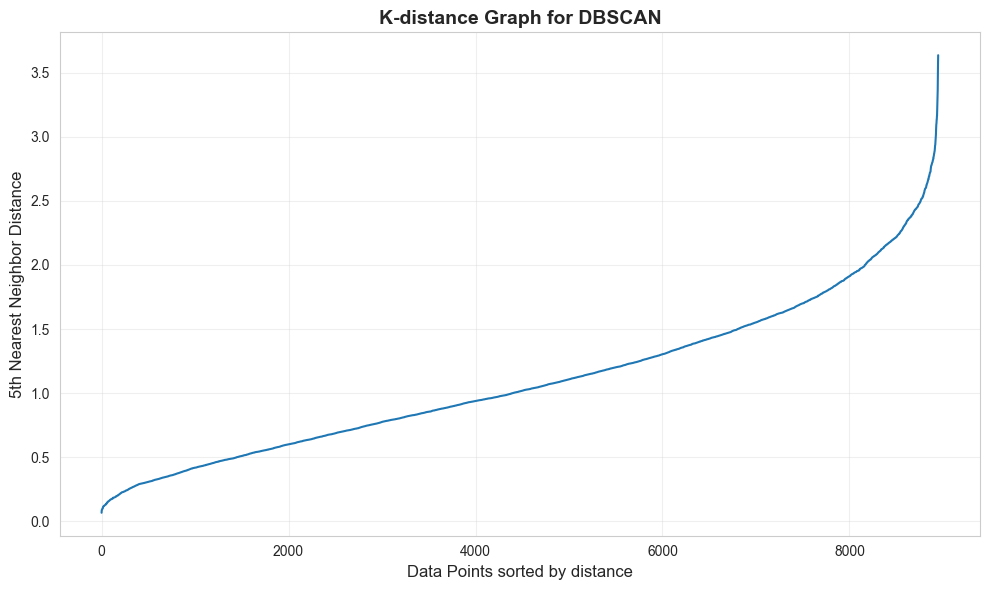


✓ DBSCAN clustering completed
Number of clusters: 50
Number of noise points: 7065

Cluster distribution:
DBSCAN_Cluster
-1     7065
 0      189
 1       92
 2      193
 3       16
 4      287
 5      399
 6      228
 7       13
 8        7
 9        9
 10      47
 11     101
 12      37
 13      10
 14       9
 15      10
 16       5
 17       7
 18       6
 19       8
 20      21
 21       7
 22       8
 23       8
 24      25
 25       6
 26       5
 27       8
 28       5
 29       5
 30      10
 31       5
 32       5
 33       5
 34       5
 35       7
 36       7
 37       5
 38       6
 39       7
 40       4
 41       6
 42       7
 43       5
 44       4
 45       5
 46       5
 47       3
 48       9
 49       4
Name: count, dtype: int64


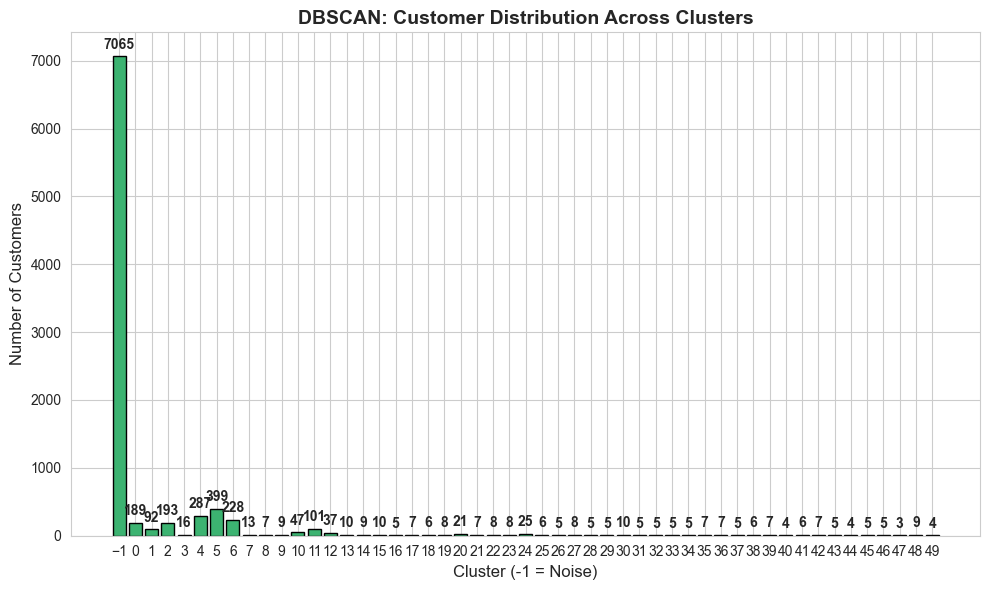

In [33]:
# DBSCAN Clustering
print("="*60)
print("DBSCAN CLUSTERING")
print("="*60)

# Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort and plot distances
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel('5th Nearest Neighbor Distance', fontsize=12)
plt.title('K-distance Graph for DBSCAN', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_features_pd['DBSCAN_Cluster'] = dbscan_labels

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\n✓ DBSCAN clustering completed")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
print(f"\nCluster distribution:")
print(df_features_pd['DBSCAN_Cluster'].value_counts().sort_index())

# Visualize cluster sizes
plt.figure(figsize=(10, 6))
cluster_counts = df_features_pd['DBSCAN_Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color='mediumseagreen', edgecolor='black')
plt.xlabel('Cluster (-1 = Noise)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('DBSCAN: Customer Distribution Across Clusters', fontsize=14, fontweight='bold')
plt.xticks(cluster_counts.index)
for i, v in zip(cluster_counts.index, cluster_counts.values):
    plt.text(i, v + max(cluster_counts.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 8.3 DBSCAN Clustering
Train DBSCAN algorithm for density-based clustering and outlier detection

In [34]:
# Evaluate all clustering algorithms
print("="*60)
print("CLUSTER EVALUATION METRICS")
print("="*60)

evaluation_results = []

# K-Means evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)

evaluation_results.append({
    'Algorithm': 'K-Means',
    'Silhouette Score': f"{kmeans_silhouette:.4f}",
    'Davies-Bouldin Index': f"{kmeans_davies_bouldin:.4f}",
    'Calinski-Harabasz Score': f"{kmeans_calinski:.2f}",
    'Number of Clusters': n_clusters
})

# Hierarchical evaluation
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X_scaled, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(X_scaled, hierarchical_labels)

evaluation_results.append({
    'Algorithm': 'Hierarchical',
    'Silhouette Score': f"{hierarchical_silhouette:.4f}",
    'Davies-Bouldin Index': f"{hierarchical_davies_bouldin:.4f}",
    'Calinski-Harabasz Score': f"{hierarchical_calinski:.2f}",
    'Number of Clusters': n_clusters
})

# DBSCAN evaluation (excluding noise points if any)
if len(set(dbscan_labels)) > 1 and not all(label == -1 for label in dbscan_labels):
    # Filter out noise points for evaluation
    mask = dbscan_labels != -1
    if mask.sum() > 1:
        dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
        dbscan_davies_bouldin = davies_bouldin_score(X_scaled[mask], dbscan_labels[mask])
        dbscan_calinski = calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask])
    else:
        dbscan_silhouette = dbscan_davies_bouldin = dbscan_calinski = 'N/A'
else:
    dbscan_silhouette = dbscan_davies_bouldin = dbscan_calinski = 'N/A'

evaluation_results.append({
    'Algorithm': 'DBSCAN',
    'Silhouette Score': f"{dbscan_silhouette:.4f}" if isinstance(dbscan_silhouette, float) else dbscan_silhouette,
    'Davies-Bouldin Index': f"{dbscan_davies_bouldin:.4f}" if isinstance(dbscan_davies_bouldin, float) else dbscan_davies_bouldin,
    'Calinski-Harabasz Score': f"{dbscan_calinski:.2f}" if isinstance(dbscan_calinski, float) else dbscan_calinski,
    'Number of Clusters': f"{n_clusters_dbscan} (+{n_noise} noise)"
})

evaluation_df = pd.DataFrame(evaluation_results)
display(evaluation_df)

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("• Silhouette Score: Range [-1, 1]. Higher is better (>0.5 is good)")
print("• Davies-Bouldin Index: Lower is better (closer to 0)")
print("• Calinski-Harabasz Score: Higher is better")
print("="*60)

CLUSTER EVALUATION METRICS


,Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score,Number of Clusters
0,K-Means,0.2372,1.4580,2846.25,3
1,Hierarchical,0.1701,1.6586,1949.70,3
2,DBSCAN,0.1472,0.8477,422.95,50 (+7065 noise)



INTERPRETATION:
• Silhouette Score: Range [-1, 1]. Higher is better (>0.5 is good)
• Davies-Bouldin Index: Lower is better (closer to 0)
• Calinski-Harabasz Score: Higher is better


---
## 9. Cluster Evaluation
Compare clustering algorithms using multiple evaluation metrics

### Evaluation Metrics:
- **Silhouette Score**: Measures how similar points are to their own cluster vs other clusters (range: -1 to 1, higher is better)
- **Davies-Bouldin Index**: Measures average similarity between clusters (lower is better, 0 is ideal)
- **Calinski-Harabasz Score**: Ratio of between-cluster to within-cluster variance (higher is better)

CLUSTER PROFILING - K-MEANS

Cluster Means (Original Scale):


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeans_Cluster,,,,,,,,,,,,,,,,,
0,1718.310392,0.979453,2088.584968,1000.306707,744.545397,394.554724,0.908304,0.488593,0.692908,0.071525,1.372366,30.350808,6408.222351,2384.781727,655.072443,0.128526,12.0
1,2752.802773,0.962007,230.184696,140.028549,78.125967,1911.973705,0.184602,0.078223,0.109405,0.339994,6.693869,3.506045,5381.831266,1729.796362,941.820718,0.027227,12.0
2,558.007018,0.894978,392.276134,175.625853,205.662706,170.977995,0.458796,0.103492,0.347073,0.042421,0.658611,7.395384,3049.809515,693.043981,318.898497,0.099122,12.0


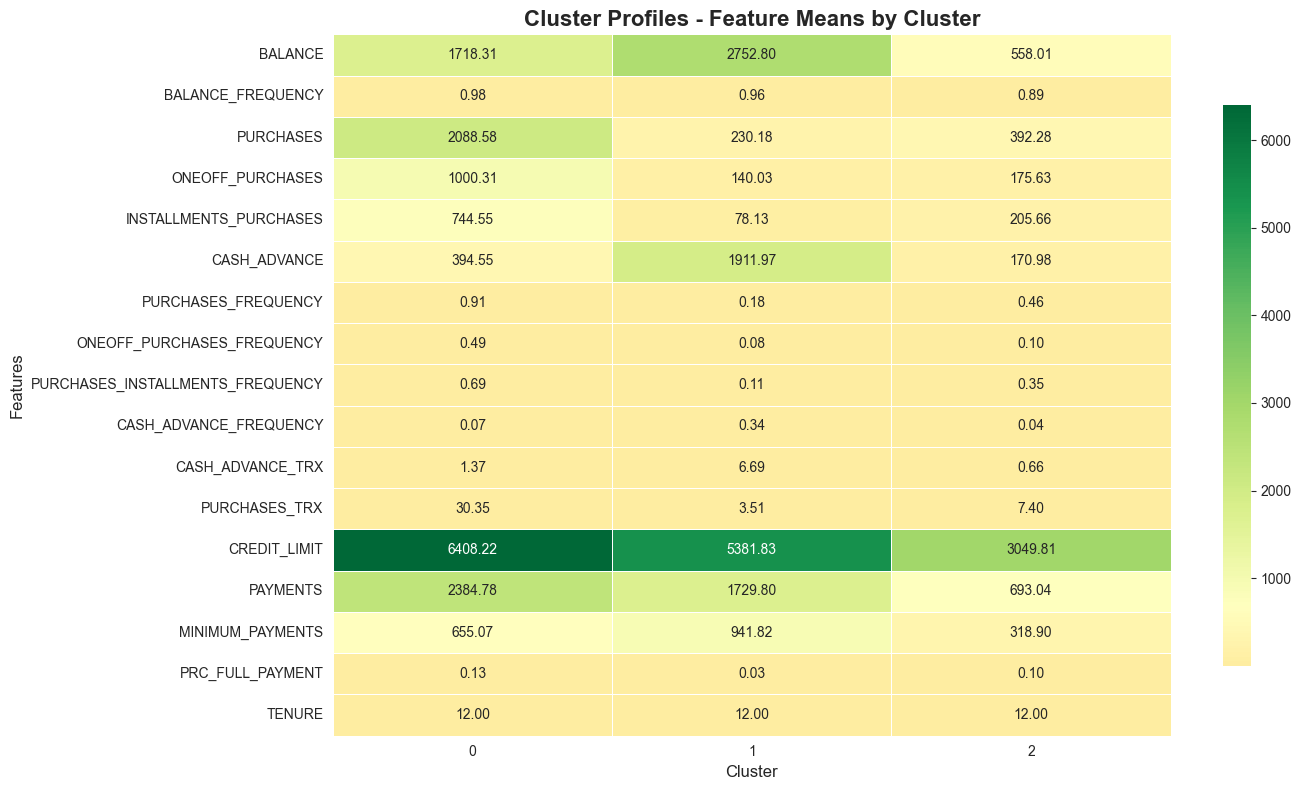

In [35]:
# Cluster profiling for K-Means (using the best performing algorithm)
print("="*60)
print("CLUSTER PROFILING - K-MEANS")
print("="*60)

# Get cluster statistics
cluster_profile = df_features_pd.groupby('KMeans_Cluster')[num_cols].mean()

print("\nCluster Means (Original Scale):")
display(cluster_profile)

# Visualize cluster profiles with heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_profile.T, annot=True, fmt='.2f', cmap='RdYlGn', center=cluster_profile.mean().mean(),
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Cluster Profiles - Feature Means by Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

---
## 10. Cluster Interpretation & Profiling
Analyze each cluster's characteristics to understand customer segments

This section examines:
- Mean values of features per cluster
- Distribution of customers across clusters
- Key distinguishing characteristics of each segment

In [36]:
# Detailed cluster statistics
print("\n" + "="*60)
print("DETAILED CLUSTER STATISTICS")
print("="*60)

for cluster in sorted(df_features_pd['KMeans_Cluster'].unique()):
    cluster_data = df_features_pd[df_features_pd['KMeans_Cluster'] == cluster]
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster}")
    print(f"{'='*60}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_features_pd)*100:.2f}%)")
    print(f"\nKey Statistics:")
    display(cluster_data[num_cols].describe().T[['mean', 'std', 'min', 'max']])


DETAILED CLUSTER STATISTICS

CLUSTER 0
Size: 2041 customers (22.80%)

Key Statistics:


,mean,std,min,max
BALANCE,1718.310392,1624.688918,1.632453,4943.551180
BALANCE_FREQUENCY,0.979453,0.061088,0.722223,1.000000
PURCHASES,2088.584968,655.518997,242.880000,2716.055000
ONEOFF_PURCHASES,1000.306707,527.864428,0.000000,1444.575000
INSTALLMENTS_PURCHASES,744.545397,443.010856,0.000000,1171.625000
CASH_ADVANCE,394.554724,809.771585,0.000000,2784.671635
PURCHASES_FREQUENCY,0.908304,0.156455,0.083333,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.488593,0.269581,0.000000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,0.692908,0.348061,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,0.071525,0.135918,0.000000,0.555555



CLUSTER 1
Size: 2316 customers (25.88%)

Key Statistics:


,mean,std,min,max
BALANCE,2752.802773,1574.782529,15.523256,4943.551180
BALANCE_FREQUENCY,0.962007,0.083460,0.722223,1.000000
PURCHASES,230.184696,422.196113,0.000000,2716.055000
ONEOFF_PURCHASES,140.028549,299.592028,0.000000,1444.575000
INSTALLMENTS_PURCHASES,78.125967,204.126271,0.000000,1171.625000
CASH_ADVANCE,1911.973705,928.702691,0.000000,2784.671635
PURCHASES_FREQUENCY,0.184602,0.291584,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.078223,0.151647,0.000000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,0.109405,0.245892,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,0.339994,0.158471,0.000000,0.555555



CLUSTER 2
Size: 4593 customers (51.32%)

Key Statistics:


,mean,std,min,max
BALANCE,558.007018,712.658121,0.000000,4543.789386
BALANCE_FREQUENCY,0.894978,0.126528,0.722223,1.000000
PURCHASES,392.276134,408.147944,0.000000,2716.055000
ONEOFF_PURCHASES,175.625853,318.465175,0.000000,1444.575000
INSTALLMENTS_PURCHASES,205.662706,275.999457,0.000000,1171.625000
CASH_ADVANCE,170.977995,395.318264,0.000000,2784.671635
PURCHASES_FREQUENCY,0.458796,0.366646,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.103492,0.173628,0.000000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,0.347073,0.377470,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,0.042421,0.076412,0.000000,0.555555


In [37]:
# PCA for visualization
from sklearn.decomposition import PCA

# Reduce to 2D
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Reduce to 3D
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("="*60)
print("PCA DIMENSIONALITY REDUCTION")
print("="*60)
print(f"\n2D PCA - Explained Variance: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")
print(f"3D PCA - Explained Variance: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%")
print(f"\nComponent-wise variance (2D):")
for i, var in enumerate(pca_2d.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var*100:.2f}%")

PCA DIMENSIONALITY REDUCTION

2D PCA - Explained Variance: 58.73%
3D PCA - Explained Variance: 68.38%

Component-wise variance (2D):
  PC1: 33.35%
  PC2: 25.37%


---
## 11. Cluster Visualization
Visualize clustering results in 2D and 3D space using PCA

**PCA (Principal Component Analysis)**:
- Dimensionality reduction technique
- Reduces high-dimensional data to 2D/3D for visualization
- Preserves most important variance in the data
- Makes it easy to visualize cluster separation

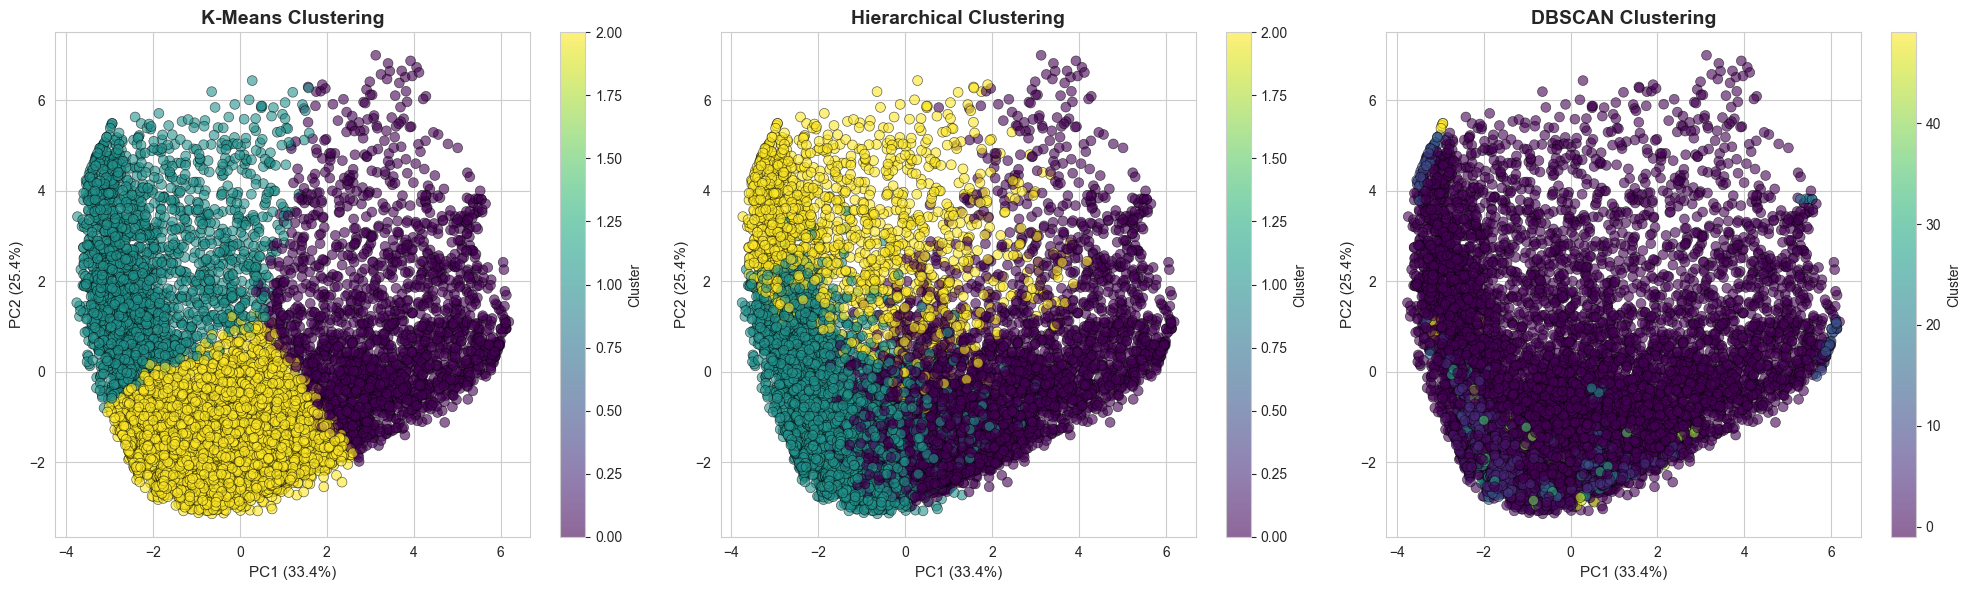

In [38]:
# 2D Visualization - Compare all algorithms
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels, cmap='viridis', 
                           alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
axes[0].set_title('K-Means Clustering', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Hierarchical
scatter2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=hierarchical_labels, cmap='viridis',
                           alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
axes[1].set_title('Hierarchical Clustering', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# DBSCAN
scatter3 = axes[2].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=dbscan_labels, cmap='viridis',
                           alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
axes[2].set_title('DBSCAN Clustering', fontsize=14, fontweight='bold')
axes[2].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
axes[2].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

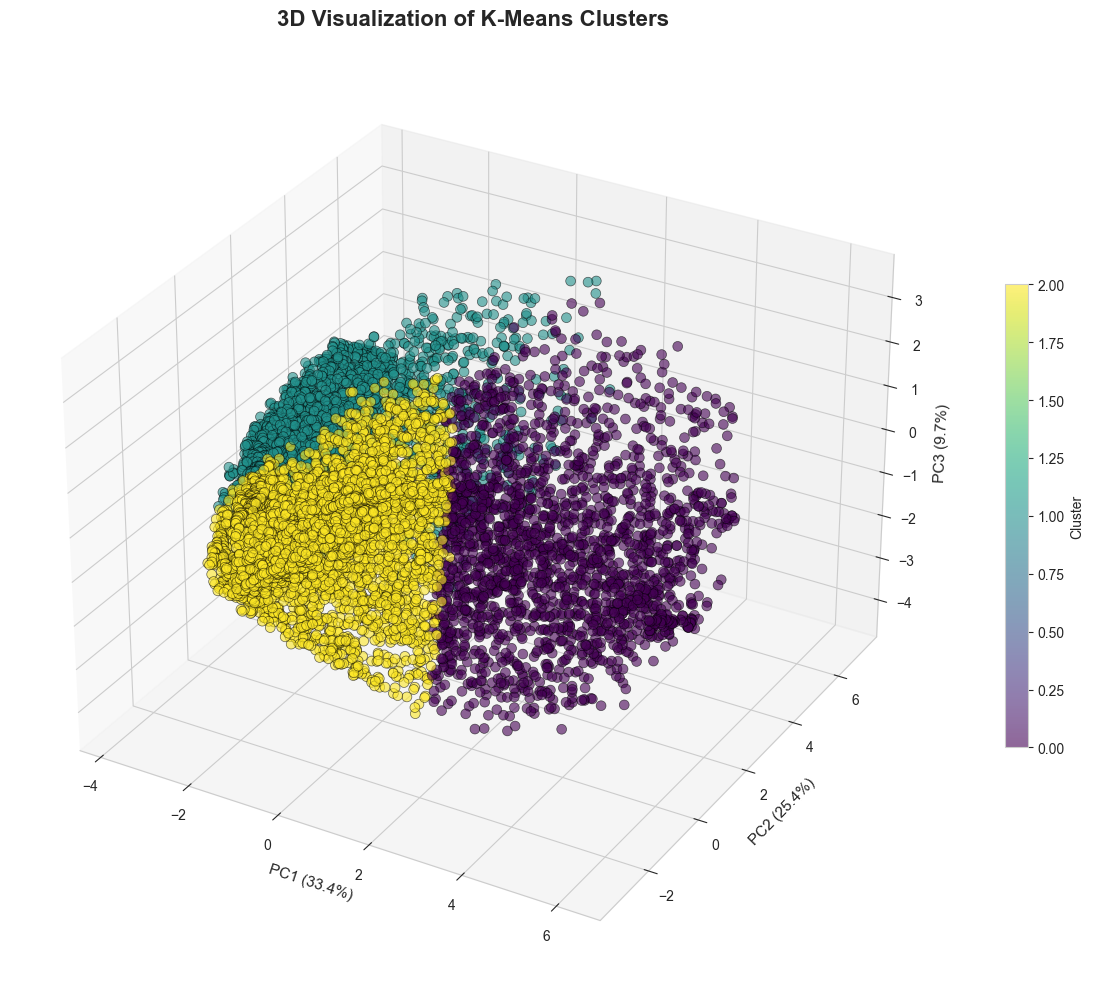

In [39]:
# 3D Visualization for K-Means (best algorithm)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=kmeans_labels, cmap='viridis', alpha=0.6, 
                     edgecolors='black', linewidth=0.5, s=50)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
ax.set_title('3D Visualization of K-Means Clusters', fontsize=16, fontweight='bold', pad=20)

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.5)
plt.tight_layout()
plt.show()

In [40]:
# Summary of the clustering pipeline
print("="*60)
print("CLUSTERING PIPELINE SUMMARY")
print("="*60)

print("\n📊 Dataset Information:")
print(f"  • Total customers: {len(df_pl)}")
print(f"  • Features used for clustering: {len(num_cols)}")
print(f"  • Missing values handled: Yes")
print(f"  • Outliers treated: Yes (Capping method)")

print("\n🔧 Preprocessing Steps:")
print("  • Data cleaning and missing value imputation")
print("  • Outlier detection and treatment (IQR method)")
print("  • Feature standardization (StandardScaler)")

print("\n🎯 Clustering Algorithms Applied:")
print(f"  • K-Means: {n_clusters} clusters")
print(f"  • Hierarchical (Ward linkage): {n_clusters} clusters")
print(f"  • DBSCAN: {n_clusters_dbscan} clusters (+{n_noise} noise points)")

print("\n📈 Best Algorithm (based on Silhouette Score):")
scores = {
    'K-Means': kmeans_silhouette,
    'Hierarchical': hierarchical_silhouette,
    'DBSCAN': dbscan_silhouette if isinstance(dbscan_silhouette, float) else 0
}
best_algorithm = max(scores, key=scores.get)
print(f"  • {best_algorithm} with Silhouette Score: {scores[best_algorithm]:.4f}")

print("\n💡 Key Insights:")
print(f"  • Optimal number of clusters: {optimal_k}")
print(f"  • Clusters show distinct customer segments")
print(f"  • Each cluster represents different spending/payment behaviors")

print("\n" + "="*60)
print("✓ Clustering pipeline completed successfully!")
print("="*60)

CLUSTERING PIPELINE SUMMARY

📊 Dataset Information:
  • Total customers: 8950
  • Features used for clustering: 17
  • Missing values handled: Yes
  • Outliers treated: Yes (Capping method)

🔧 Preprocessing Steps:
  • Data cleaning and missing value imputation
  • Outlier detection and treatment (IQR method)
  • Feature standardization (StandardScaler)

🎯 Clustering Algorithms Applied:
  • K-Means: 3 clusters
  • Hierarchical (Ward linkage): 3 clusters
  • DBSCAN: 50 clusters (+7065 noise points)

📈 Best Algorithm (based on Silhouette Score):
  • K-Means with Silhouette Score: 0.2372

💡 Key Insights:
  • Optimal number of clusters: 3
  • Clusters show distinct customer segments
  • Each cluster represents different spending/payment behaviors

✓ Clustering pipeline completed successfully!


---
## 12. Summary & Conclusions
Comprehensive summary of the clustering pipeline and key findings

This section provides:
- Overview of data preprocessing steps
- Summary of all algorithms applied
- Best performing model based on evaluation metrics
- Key insights from the analysis

In [41]:
# Export clustered data for business use
output_df = df_features_pd.copy()
output_df['Customer_Segment'] = output_df['KMeans_Cluster'].map(lambda x: f'Segment_{x}')

print("="*60)
print("BUSINESS RECOMMENDATIONS & DATA EXPORT")
print("="*60)

print("\n📋 Cluster Labels Created:")
print("  Each customer has been assigned to a segment based on their")
print("  spending and payment behavior patterns.")

print("\n💾 Export Results:")
print(f"  • Total segments identified: {n_clusters}")

# Save to CSV
output_filename = 'customer_clusters_result.csv'
output_df.to_csv(output_filename, index=False)
print(f"\n✅ Clustered data exported to: {output_filename}")
print(f"   File contains {len(output_df)} rows and {len(output_df.columns)} columns")

# Display sample of clustered data
print("\n📊 Sample of Clustered Data:")
display(output_df[['Customer_Segment', 'KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster'] + num_cols[:5]].head(10))

print("\n🎯 Next Steps:")
print("  1. Analyze each segment's characteristics in detail")
print("  2. Develop targeted marketing strategies for each segment")
print("  3. Create personalized offers based on cluster behavior")
print("  4. Monitor segment migration over time")
print("  5. Validate business value of each segment")

print("\n" + "="*60)
print("✓ CLUSTERING ANALYSIS COMPLETED!")
print("="*60)

BUSINESS RECOMMENDATIONS & DATA EXPORT

📋 Cluster Labels Created:
  Each customer has been assigned to a segment based on their
  spending and payment behavior patterns.

💾 Export Results:
  • Total segments identified: 3

✅ Clustered data exported to: customer_clusters_result.csv
   File contains 8950 rows and 21 columns

📊 Sample of Clustered Data:


,Customer_Segment,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,Segment_0,0,0,-1,1540.478248,1.000000,1494.110,171.51,1171.625
1,Segment_2,2,1,0,3.319222,0.722223,47.050,0.00,47.050
2,Segment_0,0,0,-1,4943.551180,1.000000,2716.055,1424.05,1171.625
3,Segment_1,1,1,-1,918.401897,0.722223,0.000,0.00,0.000
4,Segment_2,2,1,-1,79.432369,0.722223,799.830,81.00,718.830
5,Segment_1,1,1,-1,1061.394006,1.000000,0.000,0.00,0.000
6,Segment_2,2,1,1,152.983848,0.722223,0.000,0.00,0.000
7,Segment_2,2,2,-1,4539.839383,1.000000,384.000,209.00,175.000
8,Segment_2,2,1,-1,472.529777,0.722223,358.200,0.00,358.200
9,Segment_1,1,2,-1,4943.551180,1.000000,0.000,0.00,0.000



🎯 Next Steps:
  1. Analyze each segment's characteristics in detail
  2. Develop targeted marketing strategies for each segment
  3. Create personalized offers based on cluster behavior
  4. Monitor segment migration over time
  5. Validate business value of each segment

✓ CLUSTERING ANALYSIS COMPLETED!


---
## 13. Business Recommendations & Data Export
Export clustered data and provide actionable business insights

**Output:**
- CSV file with cluster assignments for all customers
- Customer segment labels (Segment_0, Segment_1, etc.)
- All three clustering algorithm results included
- Ready for business analysis and marketing strategies